In [6]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

afford0 = gpd.read_file('HCIDLA Affordable Housing Projects(2003-Present).geojson')
enviro0 = pd.read_excel ('CAenviroScore.xlsx')

In [7]:
ecol = ['Census Tract',
 'Total Population',
 'California County',
 'ZIP',
 'Nearby City \n(to help approximate location only)',
 'Longitude',
 'Latitude',
 'CES 3.0 Score',
 ' CES 3.0 Percentile',
 'CES 3.0 \nPercentile Range',
 'SB 535 Disadvantaged Community']

In [8]:
enviro = enviro0[ecol]

In [9]:
enviro.shape

(8035, 11)

In [10]:
enviro0.shape

(8035, 57)

In [12]:
enla = enviro.loc[enviro['California County'] == 'Los Angeles']

In [13]:
enla.shape

(2343, 11)

In [14]:
enla = enla.loc[enviro['CES 3.0 Score'] > 0]

In [15]:
enla.shape

(2298, 11)

In [16]:
enla['CES 3.0 Score'].mean()

36.493198440421985

In [17]:
enla.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),Yes
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),Yes
14,6037205120,3618,Los Angeles,90023,Los Angeles,-118.211796,34.018755,78.043685,99.823433,95-100% (highest scores),Yes
16,6037291220,3353,Los Angeles,90247,Gardena,-118.286709,33.877139,77.497763,99.798209,95-100% (highest scores),Yes
20,6037239202,4724,Los Angeles,90001,Los Angeles,-118.264977,33.985678,76.043426,99.747761,95-100% (highest scores),Yes


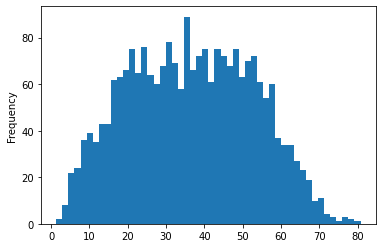

In [18]:
enla['CES 3.0 Score'].plot.hist(bins =50)

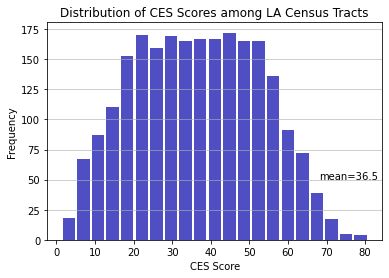

In [27]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=enla['CES 3.0 Score'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CES Score')
plt.ylabel('Frequency')
plt.title('Distribution of CES Scores among LA Census Tracts')
plt.text(68, 50, r'mean=36.5')
maxfreq = n.max()

This shows how there is great variation in LA county in regards to environmental risks by location

In [28]:
acol = ['site_units',
 'community',
 'name',
 'leverage',
 'latitude',
 'project_number',
 'hcidla_funded',
 'gps_coords',
 'longitude',
 'date_funded',
 'construction_type',
 'in_service_date',
 'address',
 'project_total_units',
 'housing_type']

In [29]:
afford = afford0[acol]

In [31]:
afford.shape

(503, 15)

In [32]:
afford0.shape

(503, 35)

reduced from 35 to 15 variables

In [49]:
afford.head()

,site_units,community,name,leverage,latitude,project_number,hcidla_funded,gps_coords,longitude,date_funded,construction_type,in_service_date,address,project_total_units,housing_type
0,0,CENTRAL,LEXINGTON APARTMENTS A/B (SITE 11),6771719.0,34.02133,05-117217,0,"(34.02133,-118.25561)",-118.25561,2005-12-28T00:00:00,REHAB,2006,"1145 E 24TH ST Los Angeles, CA 90011",251,FAMILY
1,8,CENTURY PALMS/COVE,WINDWARD APTS (A/B) (SITE 14),7438473.0,33.93817,06-117222,0,"(33.93817,-118.26374)",-118.26374,2006-04-01T00:00:00,REHAB,2007,"636 E 108TH ST 1-4 Los Angeles, CA 90059",232,FAMILY
2,16,HOLLYWOOD,BRICKER,6465419.0,34.10127,60057,627878,"(34.10127,-118.30957)",-118.30957,2007-02-24T00:00:00,ACQUISITION + REHAB,2011,"1671 N WESTERN AVE Los Angeles, CA 90028",16,SENIORS
3,20,UNIVERSITY PARK,HDR I & II (SITE 4),8116043.0,34.03158,07-117233,0,"(34.03158,-118.28106)",-118.28106,2007-07-01T00:00:00,REHAB,2008,"2375 S SCARFF ST Los Angeles, CA 90007",125,FAMILY
4,16,KOREATOWN,ALEXANDRIA HOUSE APTS.,5928306.0,34.06506,80050,800000,"(34.06506,-118.29775)",-118.29775,2008-11-21T00:00:00,REHAB,2010,"510 S ALEXANDRIA AVE 1-20 Los Angeles, CA 90020",16,SPECIAL NEEDS
